In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import os
import netCDF4 as nc
import cartopy.crs as ccrs

In [2]:
# TODO:
# 1. Check dulu file nc udah bener waktu, lon, latnya blum : udah bener
# 2. Liat dokumentasi contourf : aman
# 3. Coba plot per data nc (per tahun) : harusnya udah aman (baru per jam)
# 4. Simpen gambar/plot dalam bentuk .jpg dalem folder datas/variables/nama_variable/visualization/tahun_data : sedang dikerjakan
# 5. Kalo udah bner coba buat GIF : kalo udah gambarnya ada semua (sedang dikerjakan)

In [3]:
# 1.
# a. buat meshgrid pake lan lot : gausah ternyata
# b. ambil value buat contournya : udah bisa
# c. warna pake cmap : ini nantian

In [5]:
# Maunya gimana?
# 1. Per file nc aja
# 2. Loop waktunya di dalemnya 
# 3. Langsung simpen dalam bentuk gambar

def datetime_to_normaldate(times):
    time_linspace = []
    for time in times:
        time = str(time)
        year = time[0:4]
        month = time[5:7]
        day = time[8:10]
        time_linspace.append(year + "-" + month + "-" + day)
    return time_linspace

def spasial_plot_waktu(lon, lat, season, value, variabledata, folderpath):
    px = 1/plt.rcParams['figure.dpi']

    variablecode=variabledata["code"]
    variablename=variabledata["name"]
    variablesatuan=variabledata["satuan"]
    
    lonv, latv = np.meshgrid(lon, lat)

    folderpath = folderpath + "/" + variablecode + "/visualization/"
    if (not(os.path.exists(folderpath))):
        os.makedirs(folderpath, exist_ok=True)  

    plt.figure(1)
    ax = plt.axes(projection=ccrs.PlateCarree())
    fig = ax.figure
    ax.contourf(lonv, latv, value, cmap=plt.cm.rainbow)
    ax.coastlines()
    
    ax.gridlines(draw_labels=True)
    ax.text(-0.28, 0.55, 'Latitude', va='bottom', ha='center',
            rotation='vertical', rotation_mode='anchor',
            transform=ax.transAxes)
    ax.text(0.5, -0.13, 'Longitude', va='bottom', ha='center',
            rotation='horizontal', rotation_mode='anchor',
            transform=ax.transAxes)
    
    ax.set_title(variablename + "\n" + season + " " + "2013")
    plt.colorbar(ax.contourf(lon, lat, value, cmap=plt.cm.rainbow), ax=ax, label=variabledata["satuan"], location="bottom")
    fig.set_size_inches(10, 6)

    plt.show()

    filename = variablecode + "_" +  season + "_" + "2013" ".jpg"
    targetpath = folderpath + filename
    
    fig.savefig(targetpath)

def waktu_plot_spasial(value, time_linspace, variabledata, folderpath):
    variablecode=variabledata["code"]
    variablename=variabledata["name"]
    variablesatuan=variabledata["satuan"]

    folderpath = folderpath + "/" + variablecode + "/visualization/"

    plt.figure(2)
    plt.figure(figsize=(10,6))
    plt.plot(time_linspace, value, color="black")
    step = len(time_linspace) // 3  # Adjust to set fewer ticks, e.g., every 10th label
    ticks = time_linspace[::step]
    plt.xticks(ticks)

    plt.title("Timeseries of " + variablename + "\n" + " " + "2013",fontweight = 'bold')
    plt.xlabel('Waktu', fontsize=14, fontweight='bold')
    plt.ylabel(variablesatuan, fontsize=14, fontweight='bold')
    
    plt.rcParams['xtick.labelsize'] = 14
    plt.rcParams['ytick.labelsize'] = 14
    plt.rcParams['axes.labelweight'] = 'bold'
    plt.grid()
    
    filename = variablecode  + "_timeseries_2013.jpg"
    targetpath = folderpath + filename
    
    plt.savefig(targetpath) 
    

In [66]:
# Untuk Qnet

def datetime_to_normaldate(times):
    time_linspace = []
    for time in times:
        time = str(time)
        year = time[0:4]
        month = time[5:7]
        day = time[8:10]
        time_linspace.append(year + "-" + month + "-" + day)
    return time_linspace

def spasial_plot_waktu_total(lon, lat, season, value, variabledata, folderpath):
    px = 1/plt.rcParams['figure.dpi']

    variablecode=variabledata["code"]
    variablename=variabledata["name"]
    variablesatuan=variabledata["satuan"]
    
    lonv, latv = np.meshgrid(lon, lat)

    folderpath = folderpath + "/" + variablecode + "/visualization/"
    if (not(os.path.exists(folderpath))):
        os.makedirs(folderpath, exist_ok=True)  

    plt.figure(1)
    ax = plt.axes(projection=ccrs.PlateCarree())
    fig = ax.figure
    ax.contourf(lonv, latv, value, cmap=plt.cm.rainbow)
    ax.coastlines()
    
    ax.gridlines(draw_labels=True)
    ax.text(-0.28, 0.55, 'Latitude', va='bottom', ha='center',
            rotation='vertical', rotation_mode='anchor',
            transform=ax.transAxes)
    ax.text(0.5, -0.13, 'Longitude', va='bottom', ha='center',
            rotation='horizontal', rotation_mode='anchor',
            transform=ax.transAxes)
    
    ax.set_title(variablename + "\n" + season + " " + "2013")
    plt.colorbar(ax.contourf(lon, lat, value, cmap=plt.cm.rainbow), ax=ax, label=variabledata["satuan"], location="bottom")
    fig.set_size_inches(10, 6)

    plt.show()

    filename = variablecode + "_" +  season + "_" + "2013" ".jpg"
    targetpath = folderpath + filename
    
    fig.savefig(targetpath)

def waktu_plot_spasial_total(value, time_linspace, variabledata, folderpath):
    variablecode=variabledata["code"]
    variablename=variabledata["name"]
    variablesatuan=variabledata["satuan"]

    folderpath = folderpath + "/" + variablecode + "/visualization/"

    plt.figure(2)
    plt.figure(figsize=(10,6))
    plt.plot(time_linspace, value, color="black")
    step = len(time_linspace) // 3  # Adjust to set fewer ticks, e.g., every 10th label
    ticks = time_linspace[::step]
    plt.xticks(ticks)

    plt.title("Timeseries of " + variablename + "\n" + " 2013",fontweight = 'bold')
    plt.xlabel('Waktu', fontsize=14, fontweight='bold')
    plt.ylabel(variablesatuan, fontsize=14, fontweight='bold')
    
    plt.rcParams['xtick.labelsize'] = 14
    plt.rcParams['ytick.labelsize'] = 14
    plt.rcParams['axes.labelweight'] = 'bold'
    plt.grid()
    
    filename = variablecode  + "_timeseries_2013.jpg"
    targetpath = folderpath + filename
    
    plt.savefig(targetpath) 
    

In [87]:
variablesHeatFlux = [
    # "swrad_downwards", 
    # "lwrad_downwards",
    # "mean_surface_downward_long_wave_radiation_flux",
    "mean_surface_latent_heat_flux",
    "mean_surface_net_long_wave_radiation_flux",
    "mean_surface_net_short_wave_radiation_flux",
    "mean_surface_sensible_heat_flux",
    ]

variablesFwFlux = [
    "mean_evaporation_rate",
    "mean_surface_runoff_rate",
    "mean_total_precipitation_rate"
]

variablesDictHeatFlux = {
    "swrad_downwards" : {
        "code" : "ssrd",
        "name" : "Surface Solar Radiation Downwards",
        "satuan" : "W/m^2"
    },
    "lwrad_downwards" : "",
    "mean_surface_downward_long_wave_radiation_flux" : {
        "code" : "mean_lwrad_downwards",
        "name" : "Mean Surface Downward Longwave Radiation Flux",
        "satuan" : "W/m^2",
        "value_code" : "msdwlwrf"
    },
    "mean_surface_latent_heat_flux" : {
        "code" : "mean_latent",
        "name" : "Mean Surface Latent Heat Flux",
        "satuan" : "W/m^2",
        "value_code" : "mslhf"
    },
    "mean_surface_net_long_wave_radiation_flux" : {
        "code" : "mean_lwrad_net",
        "name" : "Mean Surface Net Longwave Radiation Flux",
        "satuan" : "W/m^2",
        "value_code" : "msnlwrf"
    },
    "mean_surface_net_short_wave_radiation_flux" : {
        "code" : "mean_swrad_net",
        "name" : "Mean Surface Net Shortwave Radiation Flux",
        "satuan" : "W/m^2",
        "value_code" : "msnswrf"
    },
    "mean_surface_sensible_heat_flux" : {
        "code" : "mean_sensible",
        "name" : "Mean Surface Sensible Heat Flux",
        "satuan" : "W/m^2",
        "value_code" : "msshf"
    },
    "total_heat_flux" : {
        "code" : "total_heat_flux",
        "name" : "Total Net Heat Flux",
        "satuan" : "W/m^2",
        "value_code" : "thf"
    }
}

variablesDictFwFlux = {
    "mean_evaporation_rate" : {
        "code" : "mean_evap",
        "name" : "Mean Evaporation Rate",
        "satuan" : "m/s",
        "value_code" : "mer"
    },
    "mean_surface_runoff_rate" : {
        "code" : "mean_surf_runoff",
        "name" : "Mean Surface Runoff Rate",
        "satuan" : "m/s",
        "value_code" : "msror"
    },
    "mean_total_precipitation_rate" : {
        "code" : "mean_total_precip",
        "name" : "Mean Total Precipitation Rate",
        "satuan" : "m/s",
        "value_code" : "mtpr"
    },
    "total_freshwater_flux" : {
        "code" : "total_freshwater_flux",
        "name" : "Total Freshwater Flux",
        "satuan" : "W/m^2",
        "value_code" : "tff"
    }
}

thisfolderpath = os.getcwd()
folderpath = thisfolderpath + "/datas/variables"

for_total_spasial_hf = {
    "mean_surface_latent_heat_flux" : [],
    "mean_surface_net_long_wave_radiation_flux" : [],
    "mean_surface_net_short_wave_radiation_flux" : [],
    "mean_surface_sensible_heat_flux" : []
}
for_total_timeseries_hf = {
    "mean_surface_latent_heat_flux" : "",
    "mean_surface_net_long_wave_radiation_flux" : "",
    "mean_surface_net_short_wave_radiation_flux" : "",
    "mean_surface_sensible_heat_flux" : ""
}

for_total_spasial_fw = {
    "mean_evaporation_rate" : [],
    "mean_surface_runoff_rate" : [], 
    "mean_total_precipitation_rate" : []
}
for_total_timeseries_fw = {
    "mean_evaporation_rate" : "",
    "mean_surface_runoff_rate" : "", 
    "mean_total_precipitation_rate" : ""
}

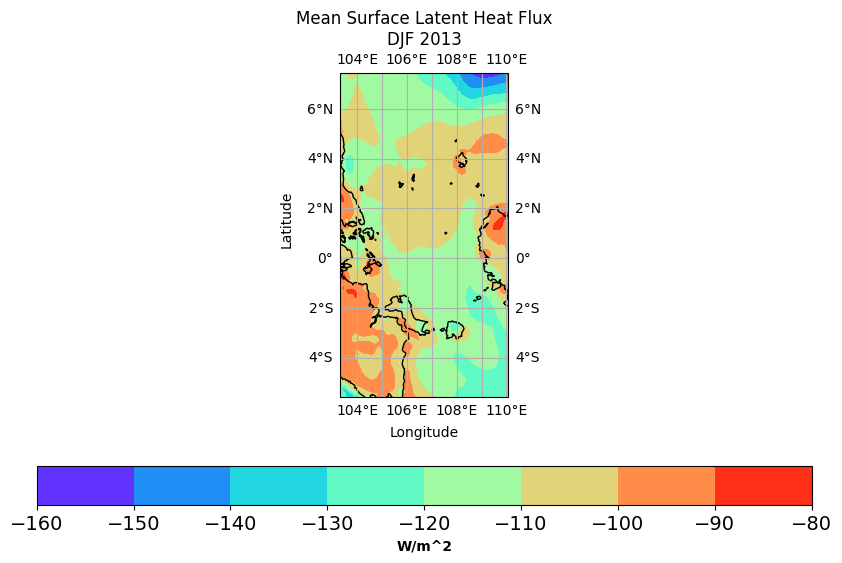

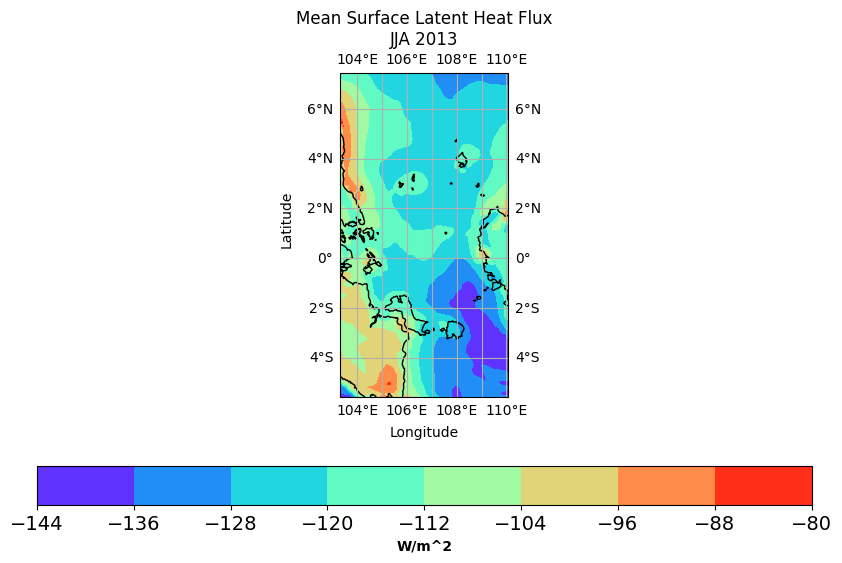

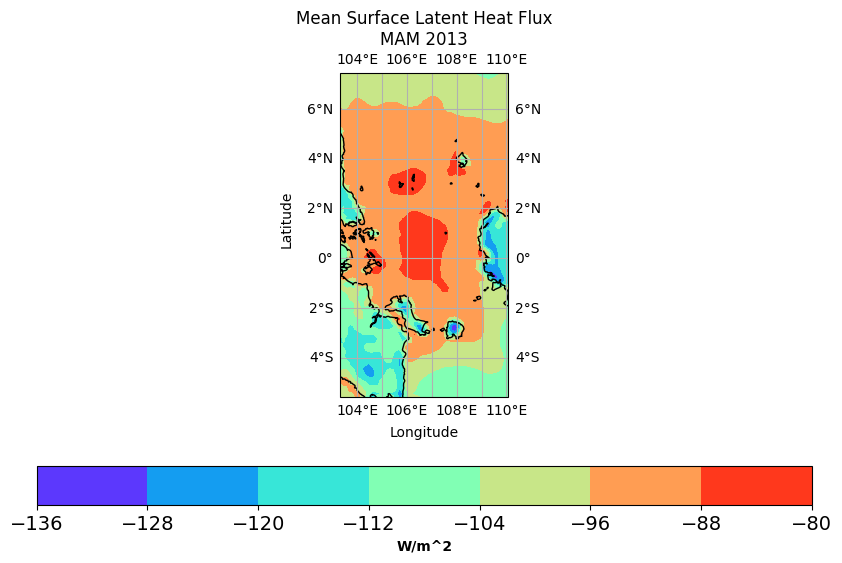

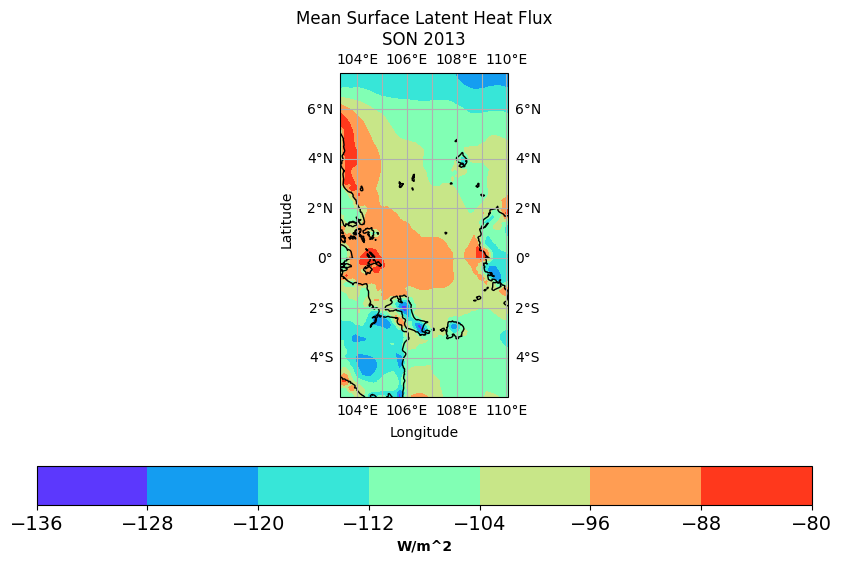

<Figure size 640x480 with 0 Axes>

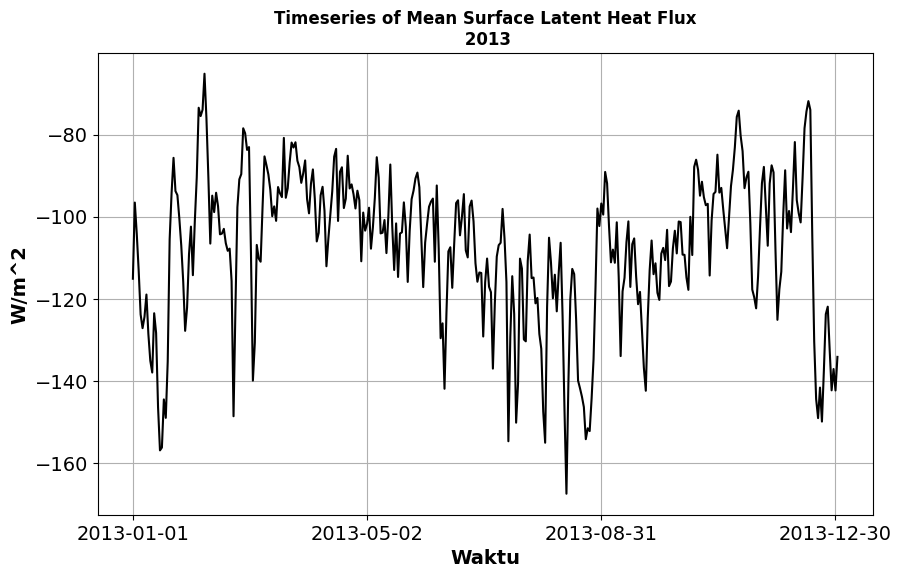

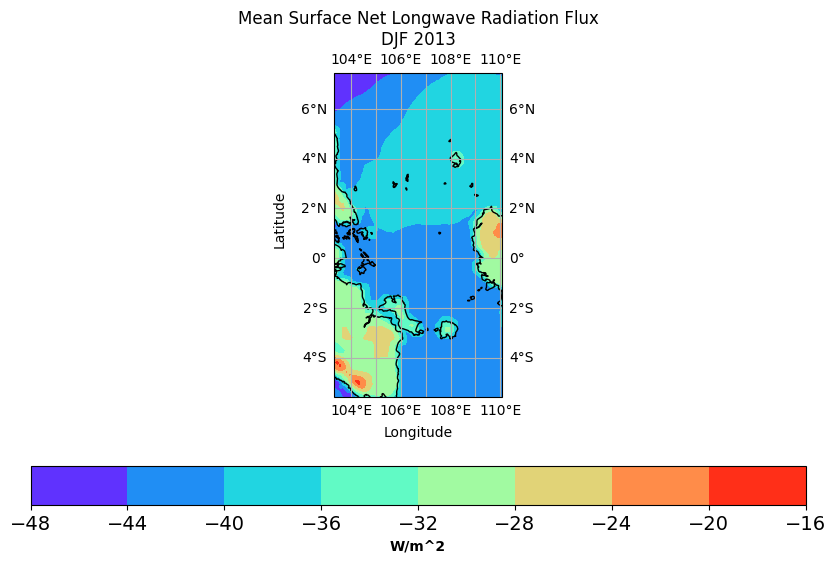

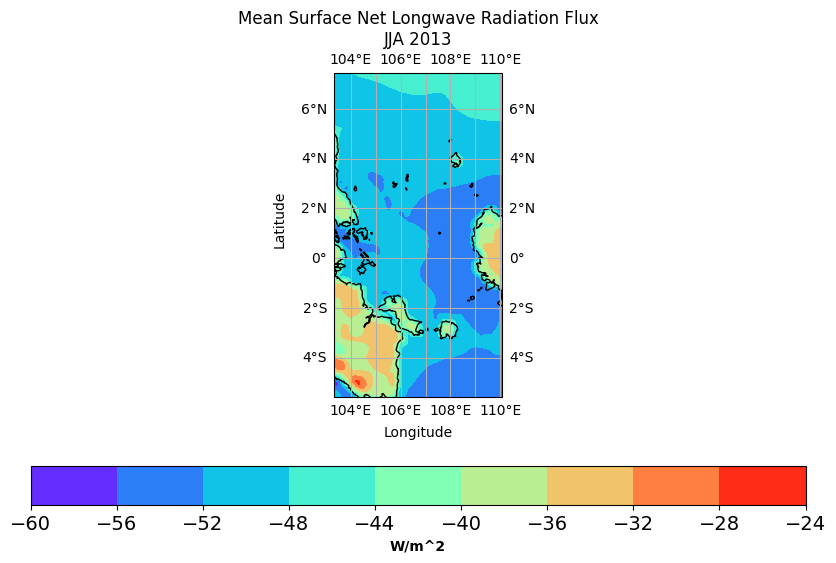

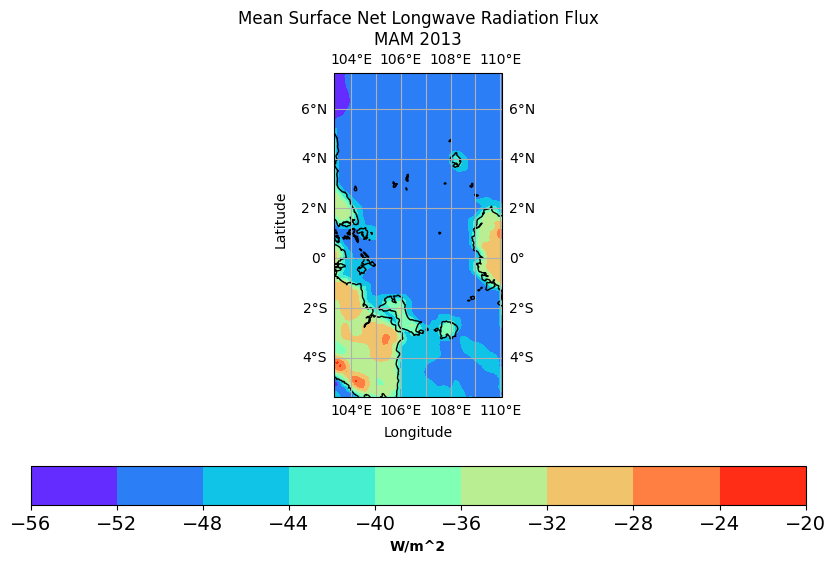

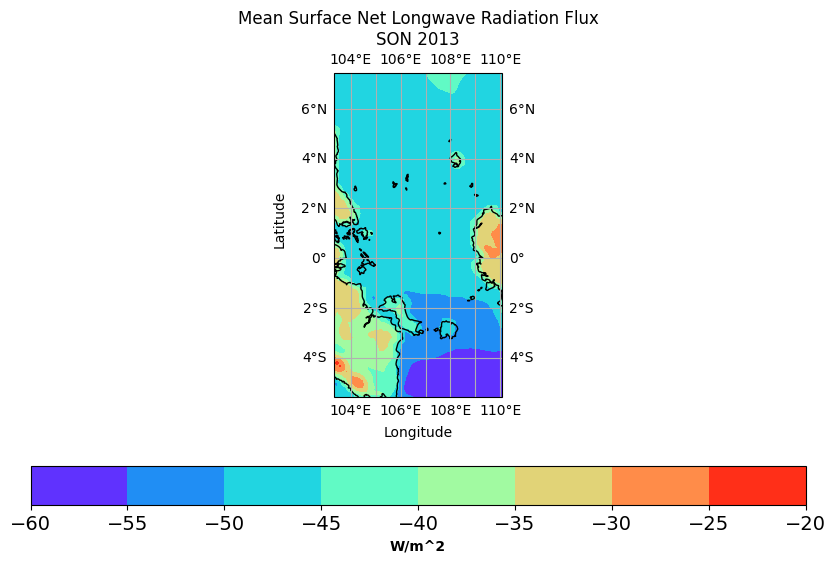

<Figure size 640x480 with 0 Axes>

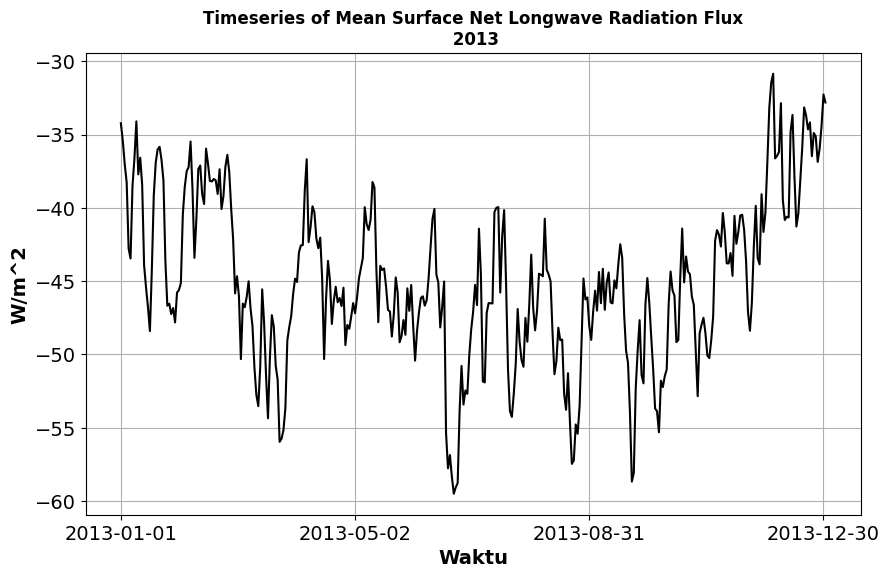

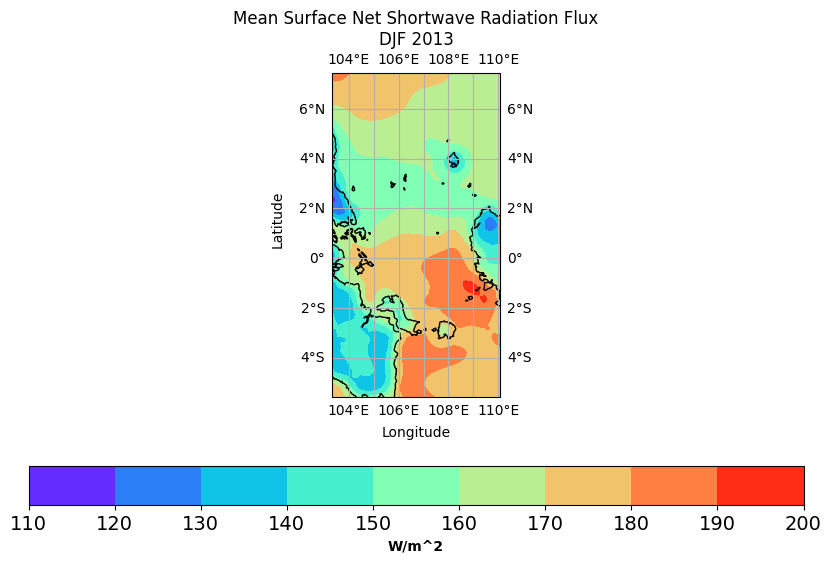

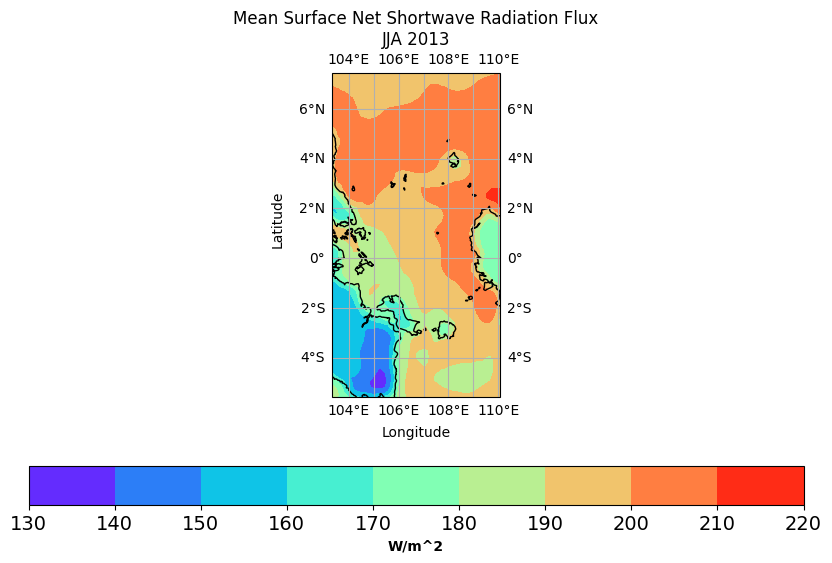

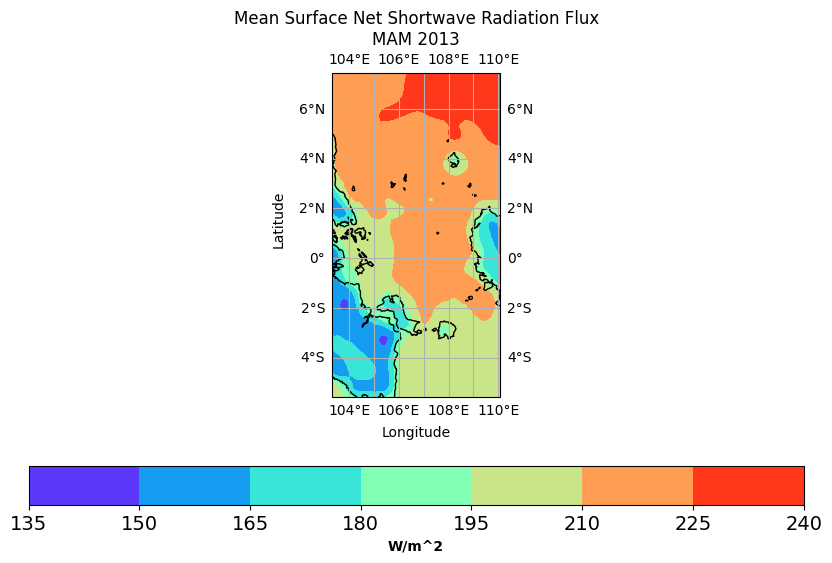

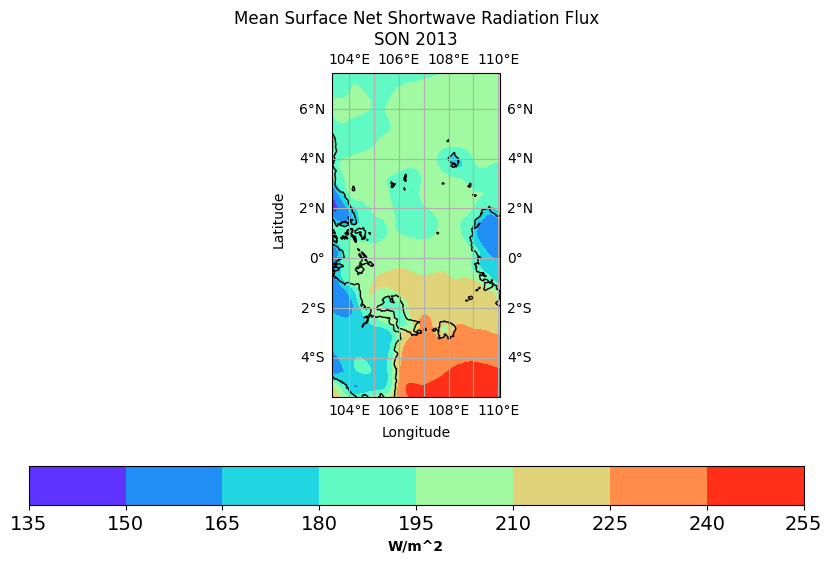

<Figure size 640x480 with 0 Axes>

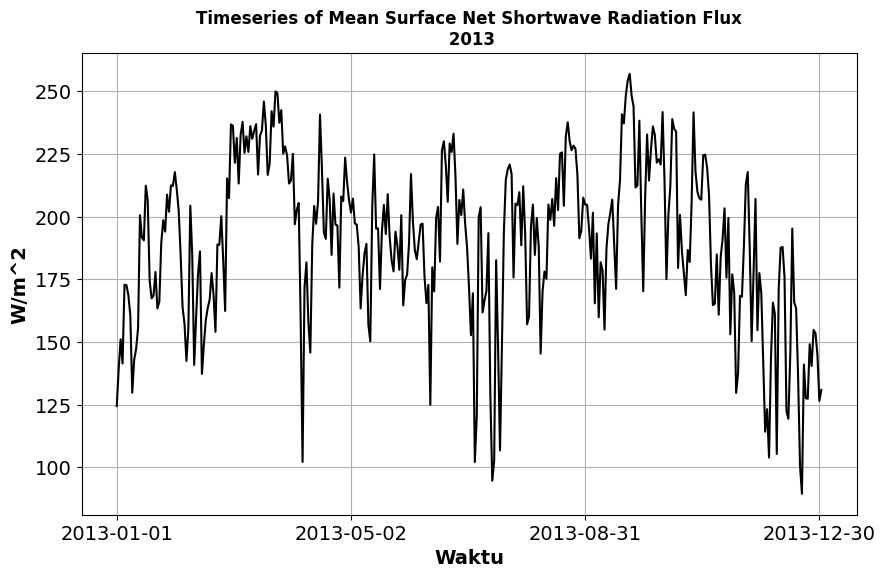

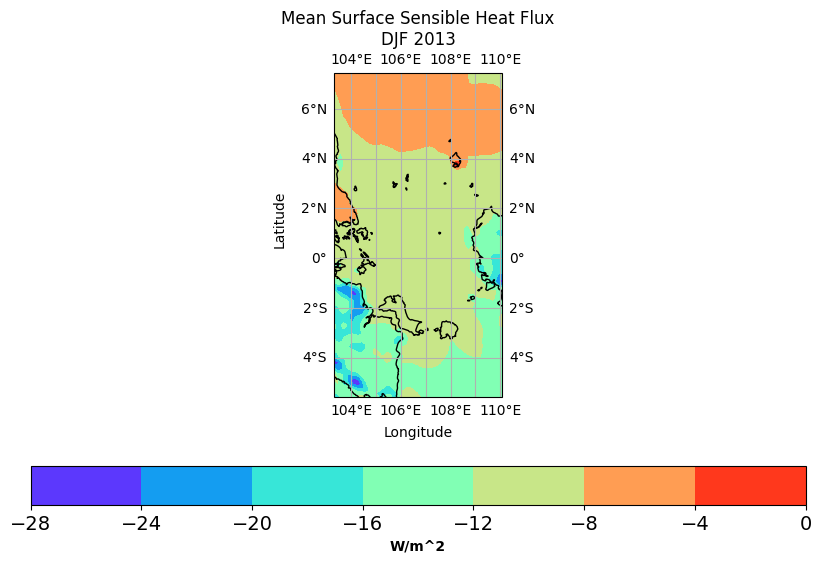

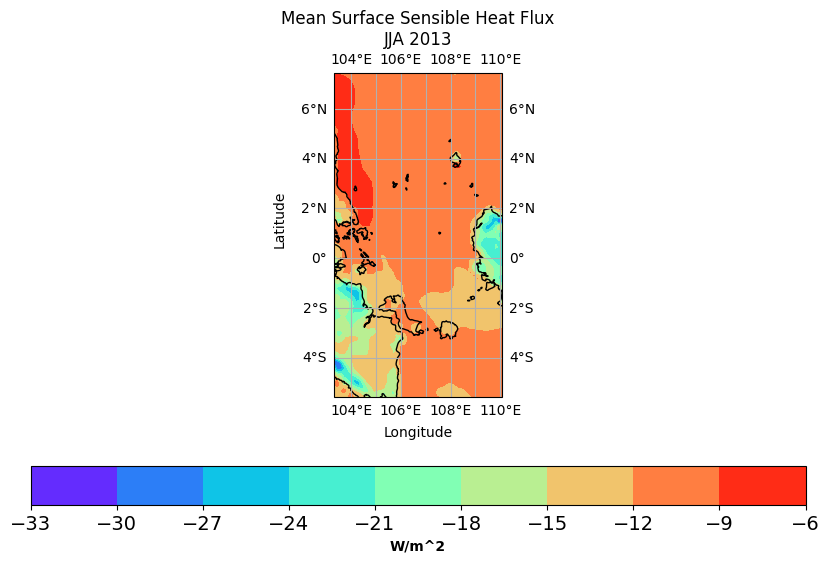

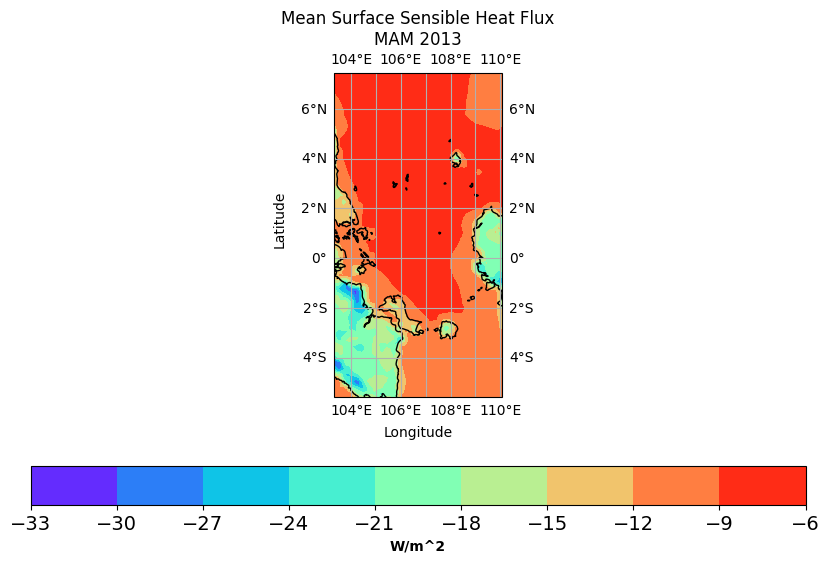

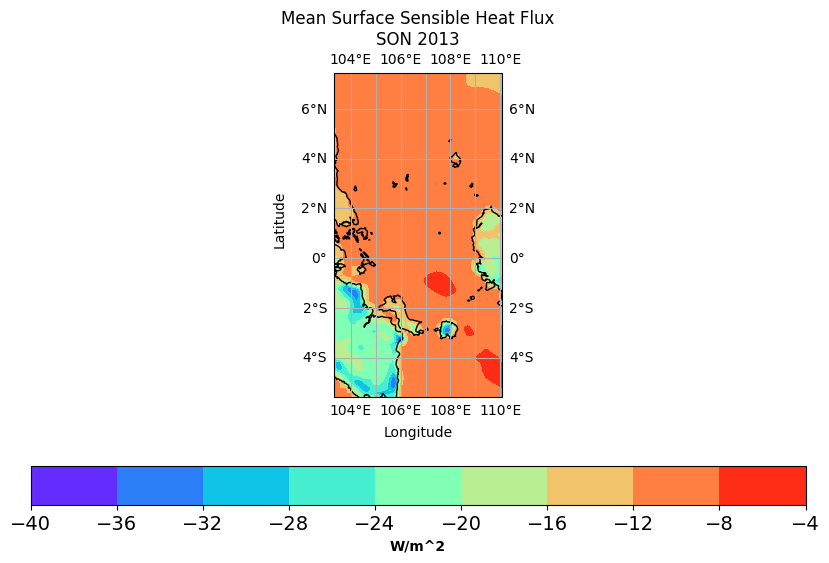

<Figure size 640x480 with 0 Axes>

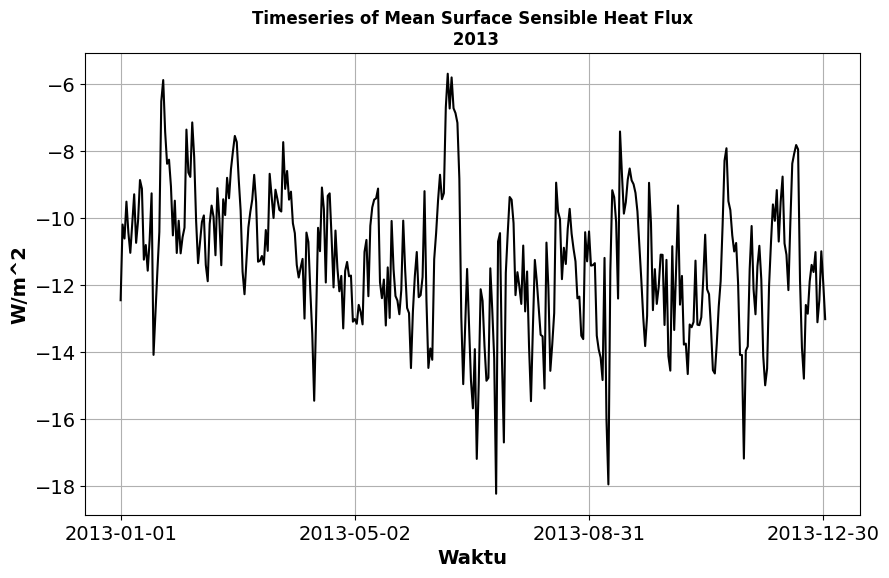

In [88]:
for variable in variablesHeatFlux:
    filepath1 = "./datas/variables/" + variablesDictHeatFlux[variable]["code"] + "/ERA5_schinsea_6hr_0_18_0125_" + variablesDictHeatFlux[variable]["code"] + "_2013.nc"
    ds1 = xr.open_dataset(filepath1)
    filepath2 = "./datas/variables/" + variablesDictHeatFlux[variable]["code"] + "/ERA5_schinsea_6hr_1_19_0125_" + variablesDictHeatFlux[variable]["code"] + "_2013.nc"
    ds2 = xr.open_dataset(filepath2)
    dsmerged = xr.merge([ds1,ds2])
    
    var = variablesDictHeatFlux[variable]["value_code"]

    lon = dsmerged["longitude"]
    lat = dsmerged["latitude"]
    for_total_spasial_hf["lat"] = lat
    for_total_spasial_hf["lon"] = lon
    time_merged = dsmerged["valid_time"]
    
    avg_times = ds1.valid_time.values + np.timedelta64(30, 'm')

    rolling_mean = dsmerged.rolling(valid_time=2, center=False, min_periods=2).mean()
    rolling_mean_times = rolling_mean.valid_time
    
    rolling_mean = rolling_mean.sel(valid_time=slice(rolling_mean_times[1], rolling_mean_times[-1]))

    even_indices_data = rolling_mean.isel(valid_time=slice(0, None, 2))

    even_indices_data["valid_time"] = avg_times

    even_indices_data_seasonal = even_indices_data.groupby("valid_time.season").mean("valid_time")

    seasons = even_indices_data_seasonal["season"].values
    
    for season_i in seasons:
        dsi = even_indices_data_seasonal.sel(season=season_i)
        value = dsi[var]
        for_total_spasial_hf[variable].append(value)
        spasial_plot_waktu(lon, lat, season_i, value, variablesDictHeatFlux[variable], folderpath)

    even_indices_data_daily_mean = even_indices_data.resample(valid_time="1D").mean("valid_time")
    even_indices_data_daily_spasial_mean = even_indices_data_daily_mean.mean(("latitude", "longitude"))
    
    value_timeseries = even_indices_data_daily_spasial_mean[var]
    time_for_timeseries = even_indices_data_daily_spasial_mean["valid_time"].values
    time_for_timeseries = datetime_to_normaldate(time_for_timeseries)
    for_total_timeseries_hf[variable] = value_timeseries

    waktu_plot_spasial(value_timeseries, time_for_timeseries, variablesDictHeatFlux[variable], folderpath)

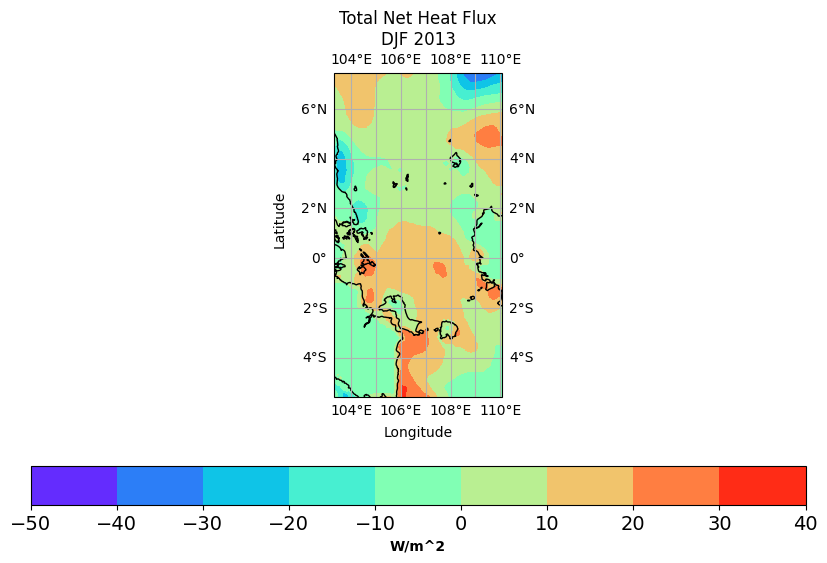

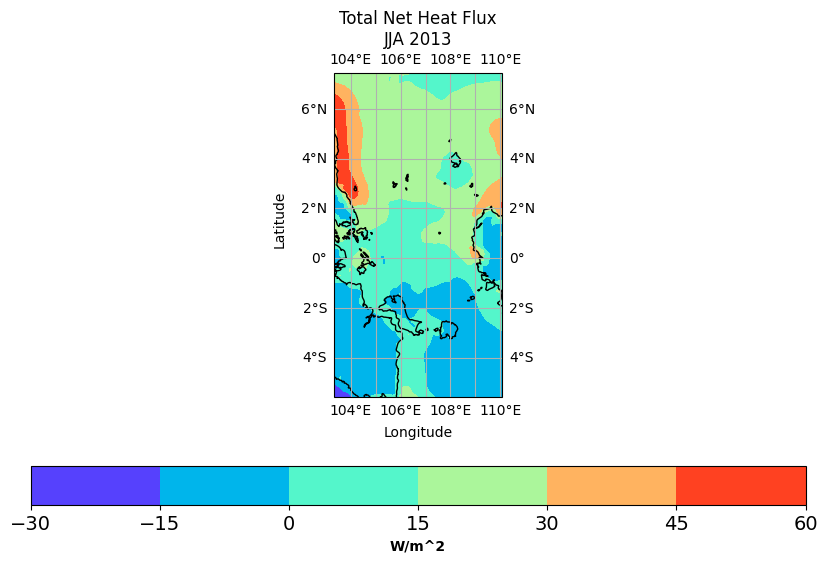

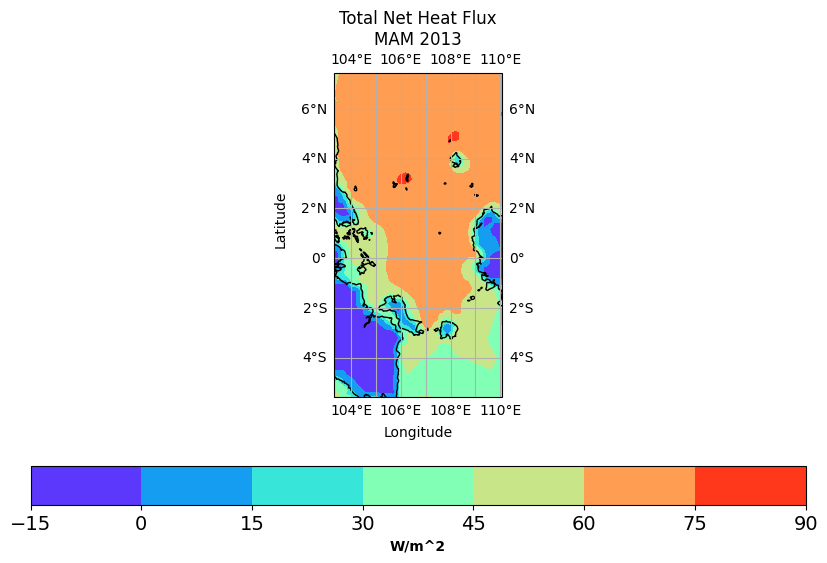

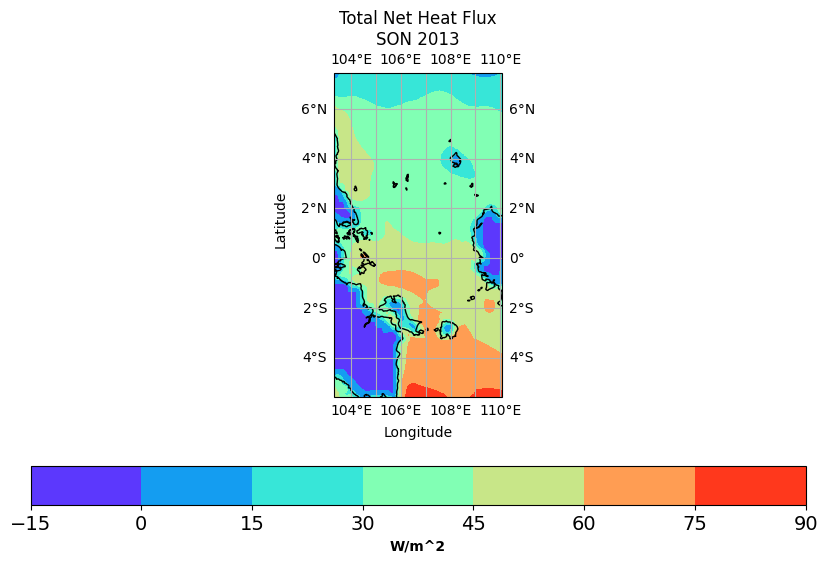

<Figure size 640x480 with 0 Axes>

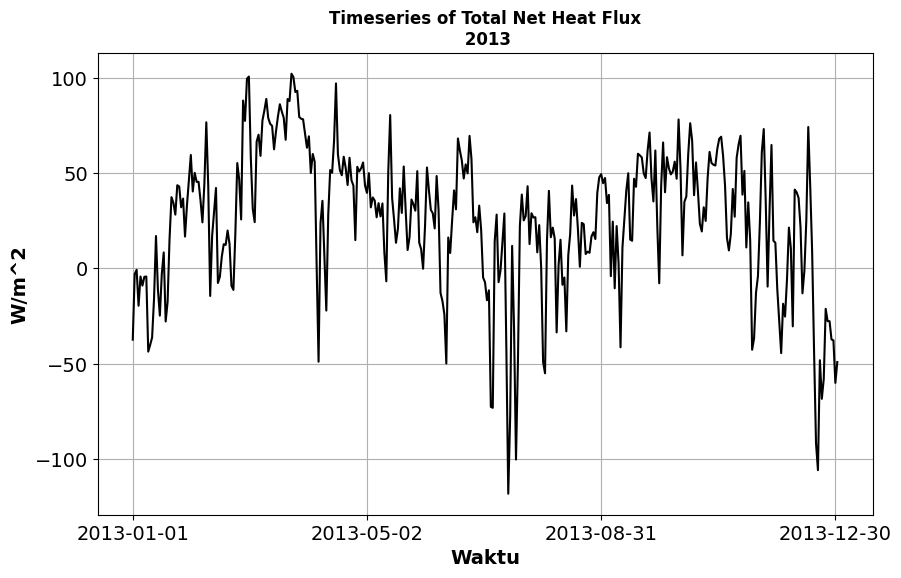

In [89]:
var1 = variablesHeatFlux[0]
var2 = variablesHeatFlux[1]
var3 = variablesHeatFlux[2]
var4 = variablesHeatFlux[3]

lon = for_total_spasial_hf[var1][0]["longitude"]
lat = for_total_spasial_hf[var1][0]['latitude']

time = for_total_timeseries_hf[var1]["valid_time"]

for i in range(4):
    var1_value_hf = for_total_spasial_hf[var1][i]
    var2_value_hf = for_total_spasial_hf[var2][i]
    var3_value_hf = for_total_spasial_hf[var3][i]
    var4_value_hf = for_total_spasial_hf[var4][i]

    season = var1_value_hf["season"].values
    
    Qnet_space = var1_value_hf + var2_value_hf + var3_value_hf + var4_value_hf
    
    spasial_plot_waktu_total(lon, lat, season, Qnet_space, variablesDictHeatFlux["total_heat_flux"], folderpath)


var1_value_hf_ts = for_total_timeseries_hf[var1]
var2_value_hf_ts = for_total_timeseries_hf[var2]
var3_value_hf_ts = for_total_timeseries_hf[var3]
var4_value_hf_ts = for_total_timeseries_hf[var4]

Qnet_time = var1_value_hf_ts + var2_value_hf_ts + var3_value_hf_ts + var4_value_hf_ts

waktu_plot_spasial_total(Qnet_time, time, variablesDictHeatFlux["total_heat_flux"], folderpath)
    

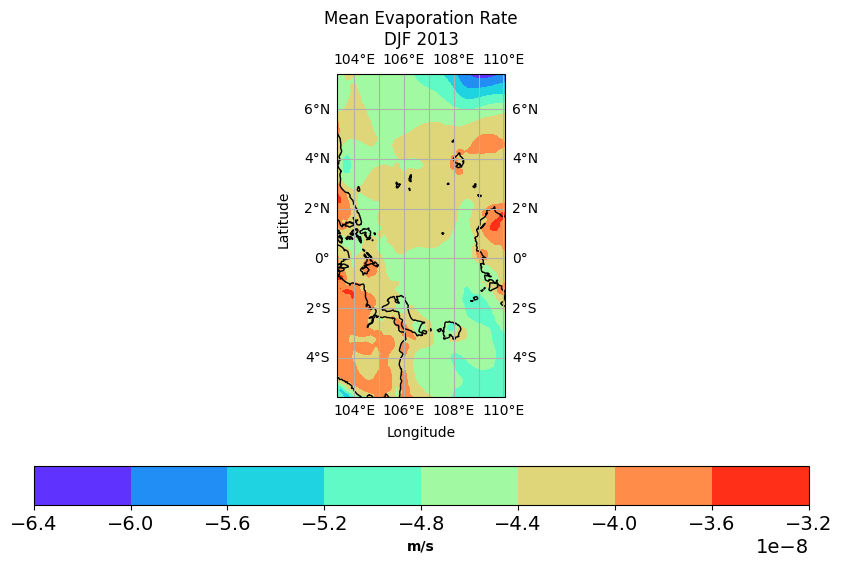

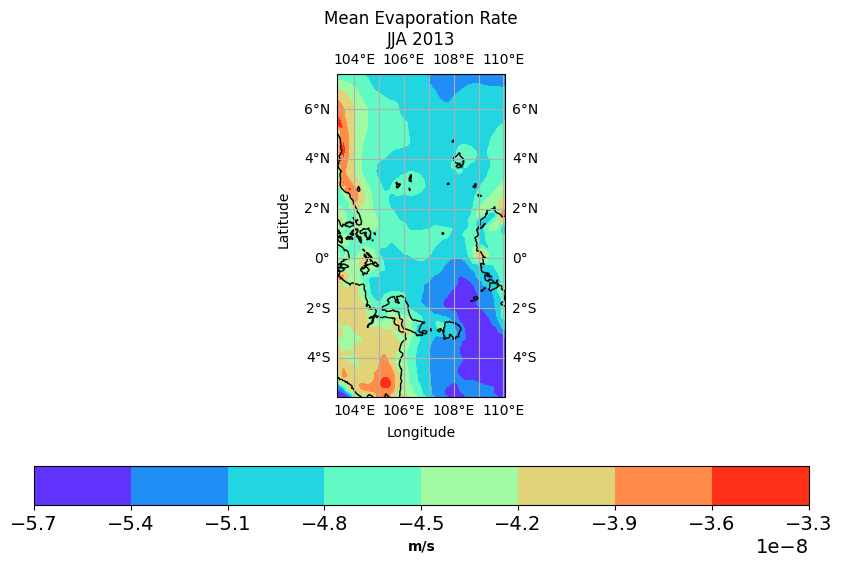

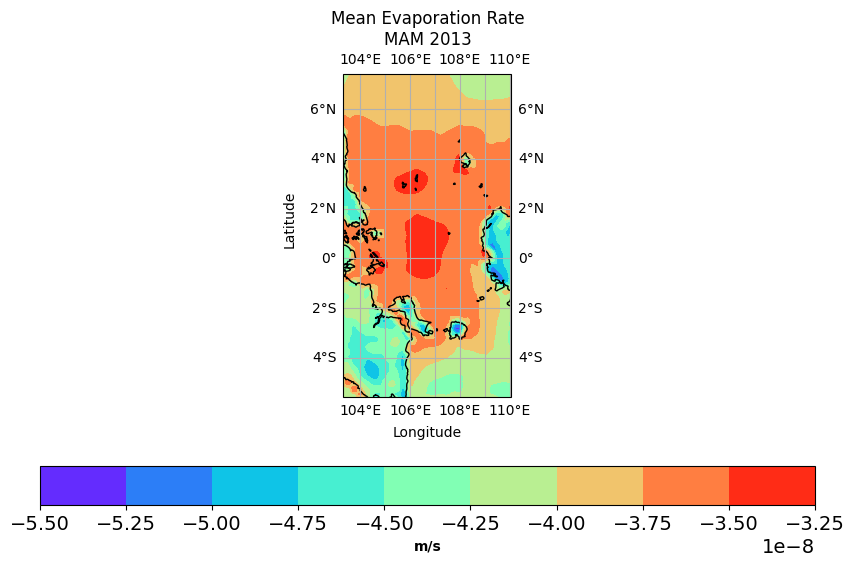

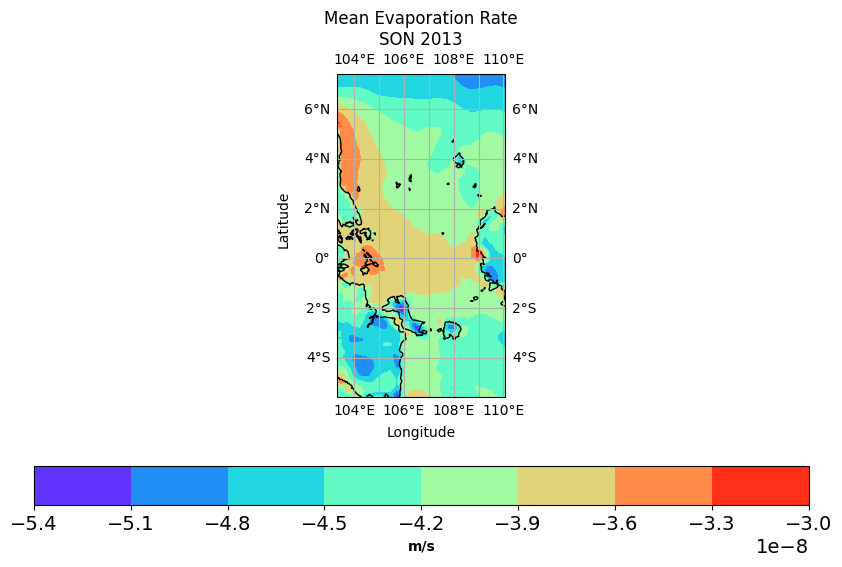

<Figure size 640x480 with 0 Axes>

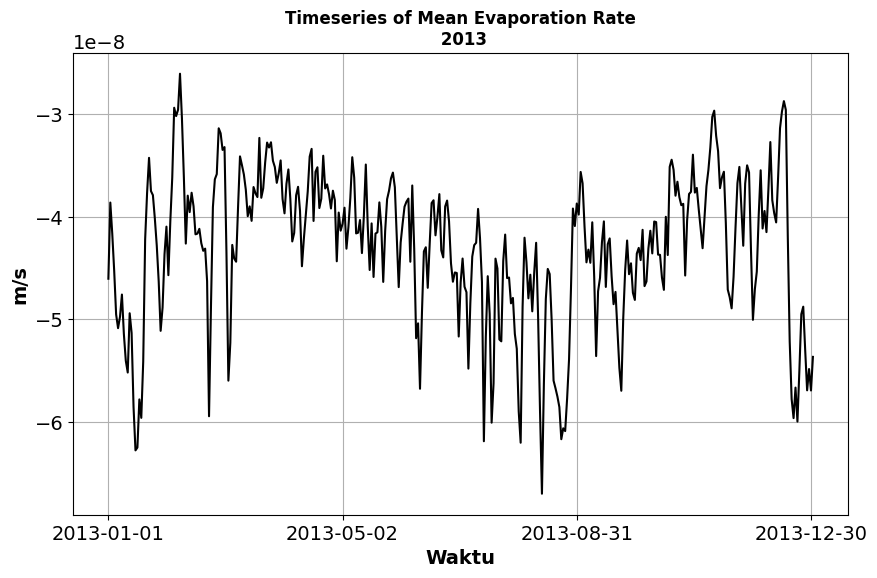

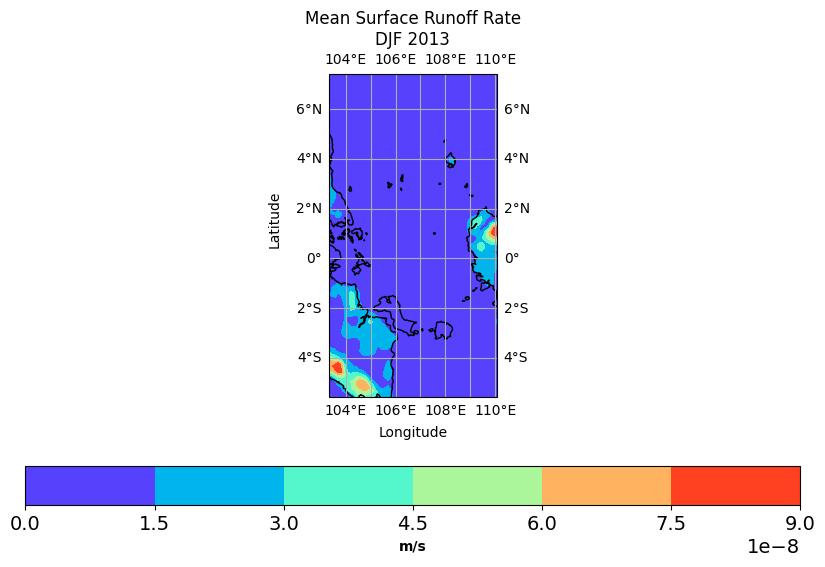

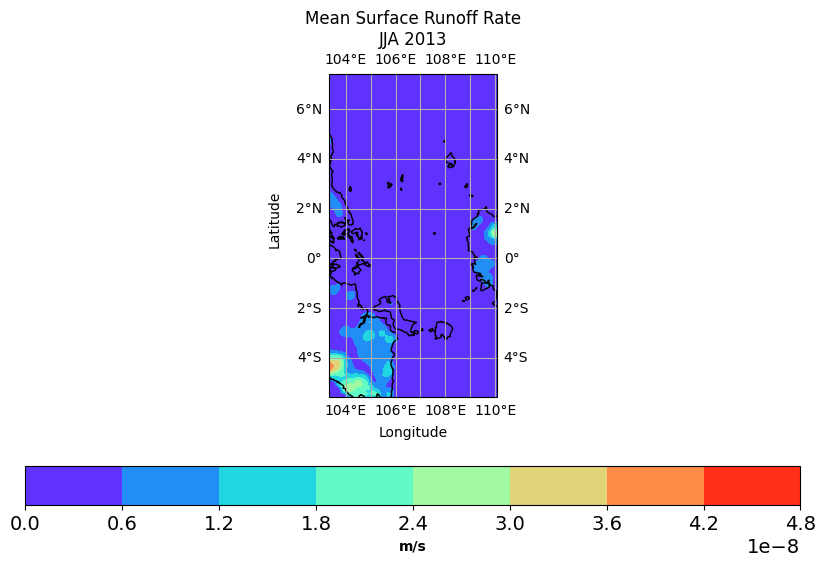

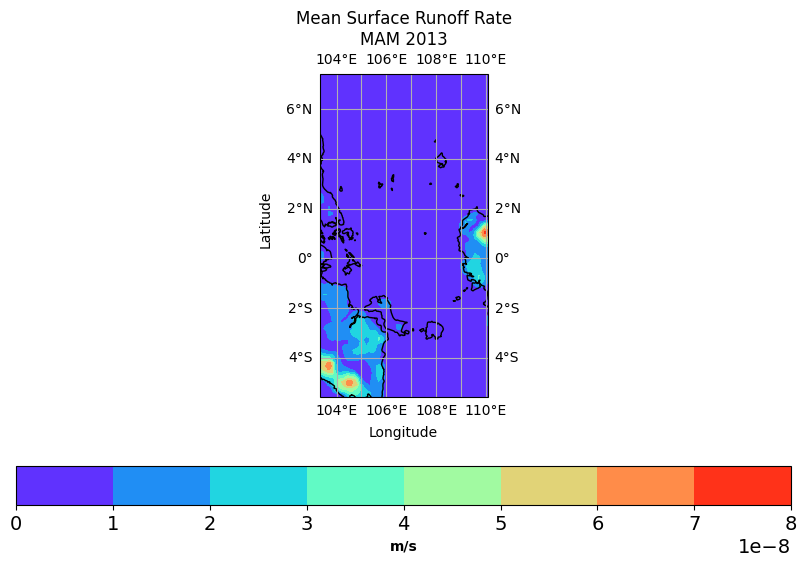

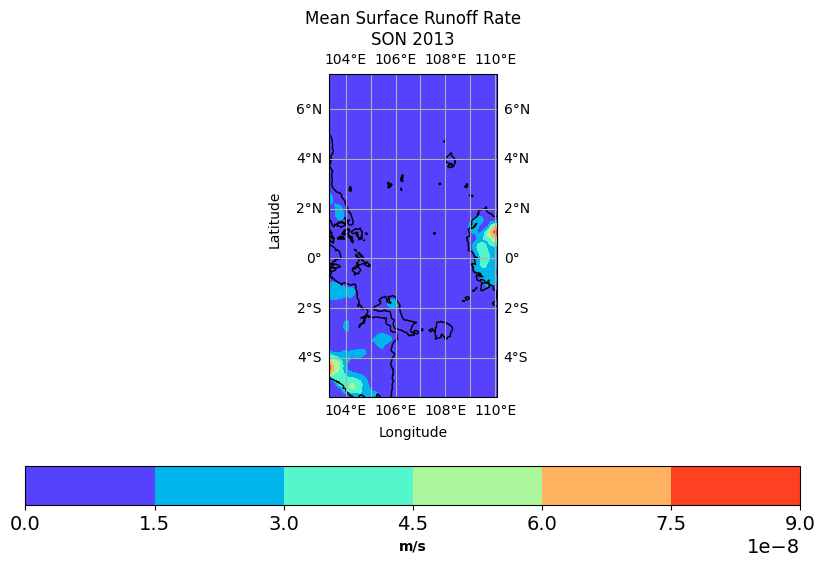

<Figure size 640x480 with 0 Axes>

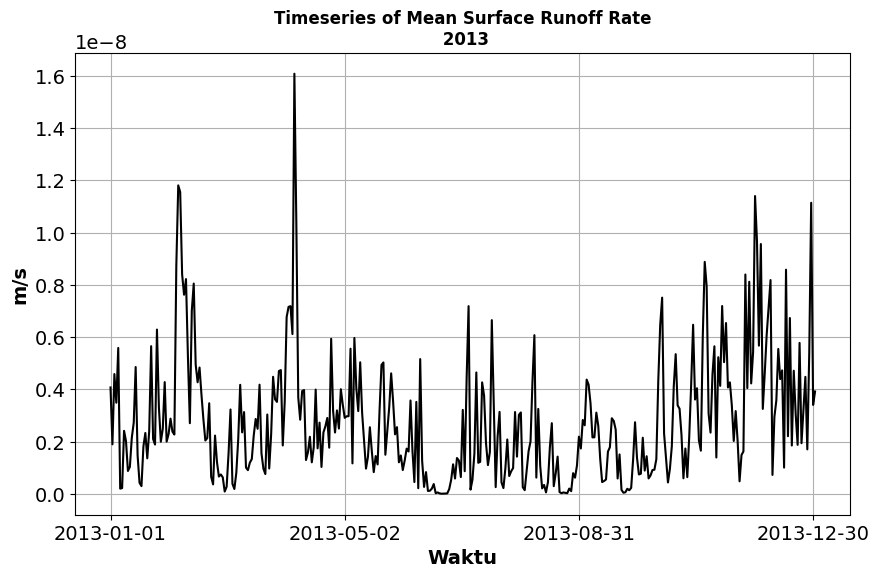

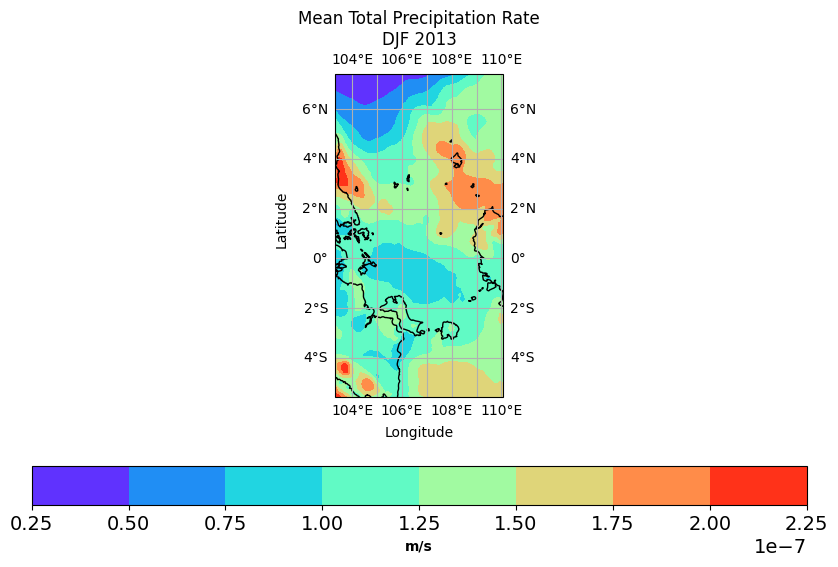

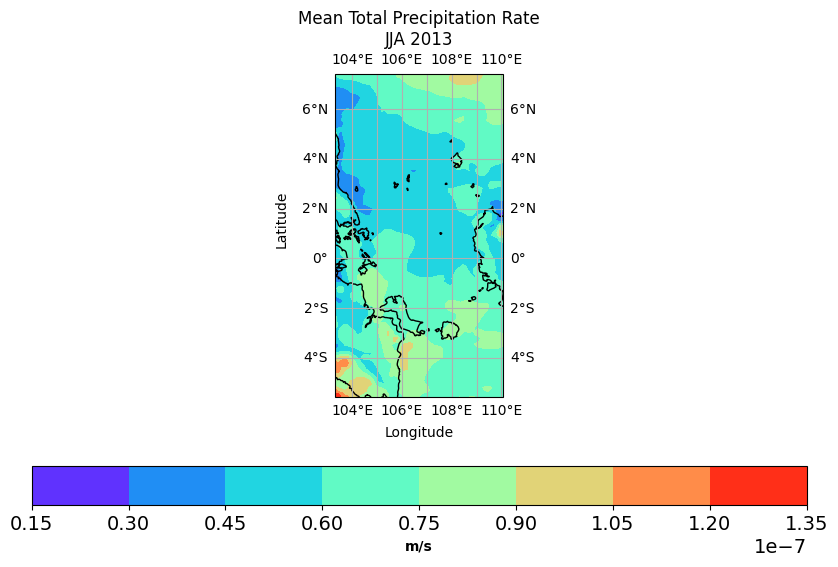

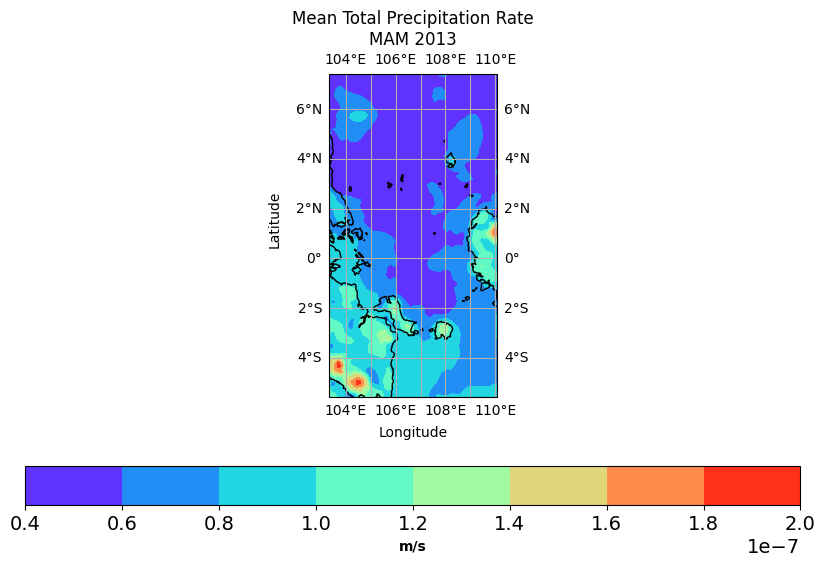

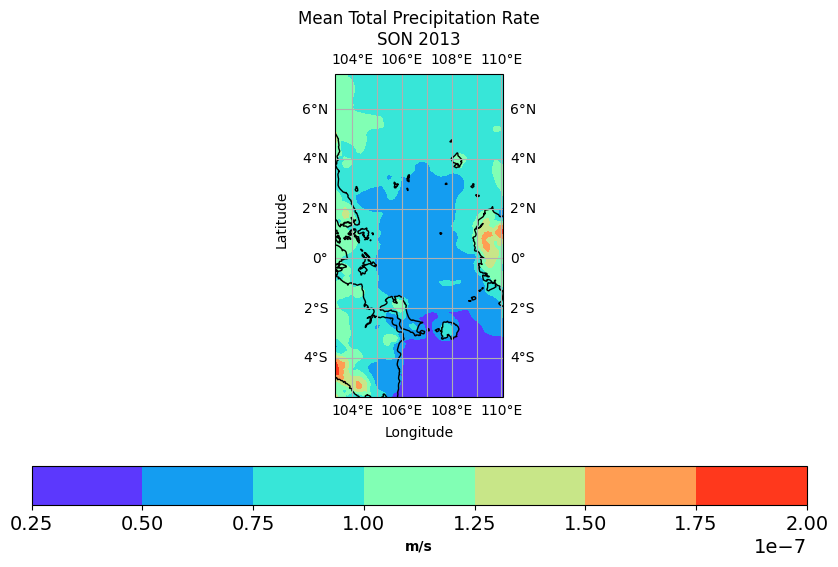

<Figure size 640x480 with 0 Axes>

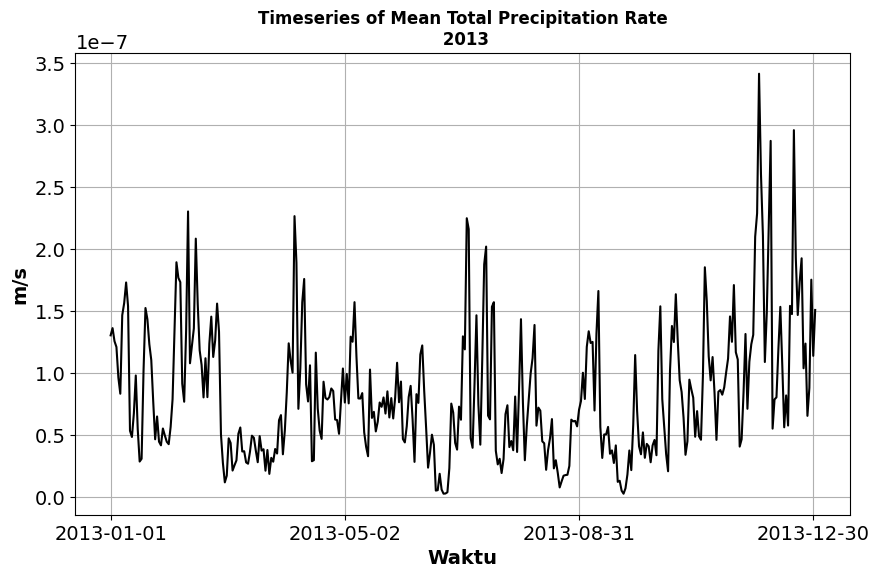

In [90]:
for variable in variablesFwFlux:
    filepath1 = "./datas/variables/" + variablesDictFwFlux[variable]["code"] + "/ERA5_schinsea_6hr_0_18_0125_" + variablesDictFwFlux[variable]["code"] + "_2013.nc"
    ds1 = xr.open_dataset(filepath1)
    filepath2 = "./datas/variables/" + variablesDictFwFlux[variable]["code"] + "/ERA5_schinsea_6hr_1_19_0125_" + variablesDictFwFlux[variable]["code"] + "_2013.nc"
    ds2 = xr.open_dataset(filepath2)
    dsmerged = xr.merge([ds1,ds2])
    
    var = variablesDictFwFlux[variable]["value_code"]

    lon = dsmerged["longitude"]
    lat = dsmerged["latitude"]
    time_merged = dsmerged["valid_time"]

    dsmerged[var] = dsmerged[var]/1000
    
    avg_times = ds1.valid_time.values + np.timedelta64(30, 'm')

    rolling_mean = dsmerged.rolling(valid_time=2, center=False, min_periods=2).mean()
    rolling_mean_times = rolling_mean.valid_time
    
    rolling_mean = rolling_mean.sel(valid_time=slice(rolling_mean_times[1], rolling_mean_times[-1]))

    even_indices_data = rolling_mean.isel(valid_time=slice(0, None, 2))

    even_indices_data["valid_time"] = avg_times

    even_indices_data_seasonal = even_indices_data.groupby("valid_time.season").mean("valid_time")

    seasons = even_indices_data_seasonal["season"].values
    
    for season_i in seasons:
        dsi = even_indices_data_seasonal.sel(season=season_i)
        value = dsi[var]
        for_total_spasial_fw[variable].append(value)
        spasial_plot_waktu(lon, lat, season_i, value, variablesDictFwFlux[variable], folderpath)

    even_indices_data_daily_mean = even_indices_data.resample(valid_time="1D").mean("valid_time")
    even_indices_data_daily_spasial_mean = even_indices_data_daily_mean.mean(("latitude", "longitude"))
    
    value_timeseries = even_indices_data_daily_spasial_mean[var]
    time_for_timeseries = even_indices_data_daily_spasial_mean["valid_time"].values
    time_for_timeseries = datetime_to_normaldate(time_for_timeseries)
    for_total_timeseries_fw[variable] = value_timeseries

    waktu_plot_spasial(value_timeseries, time_for_timeseries, variablesDictFwFlux[variable], folderpath)

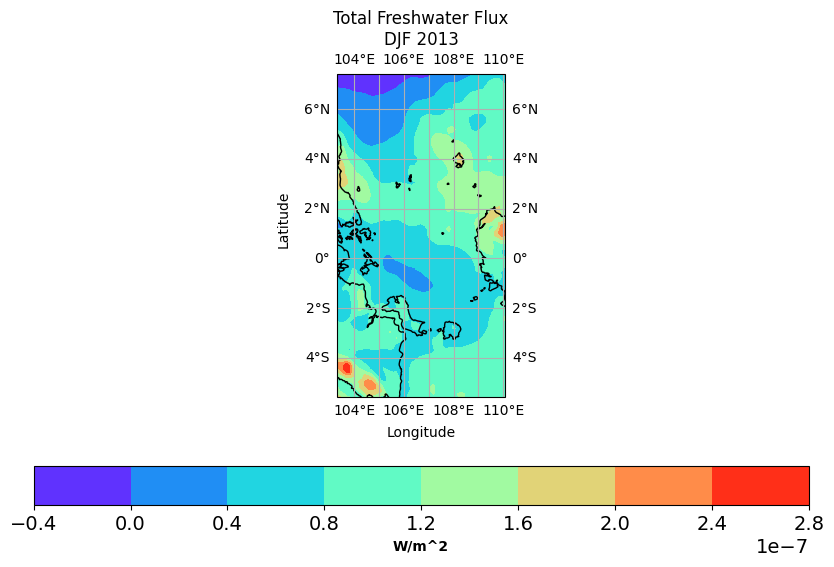

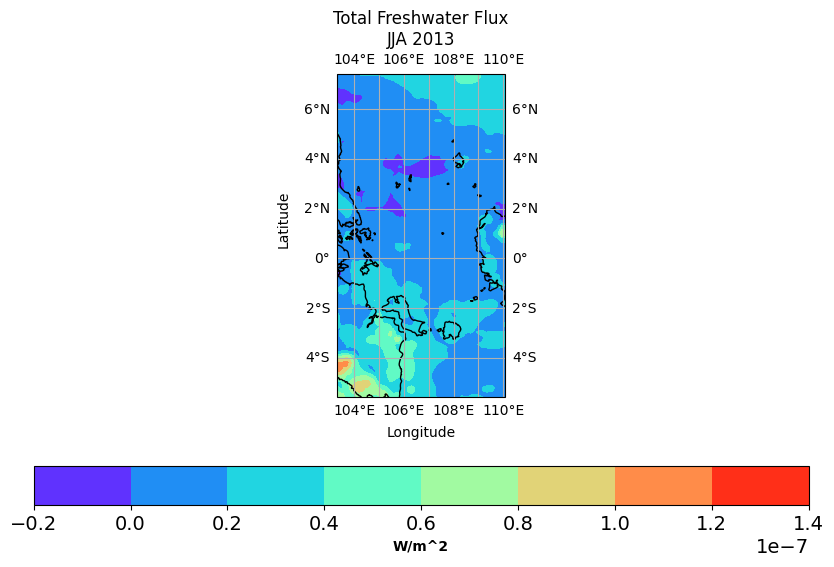

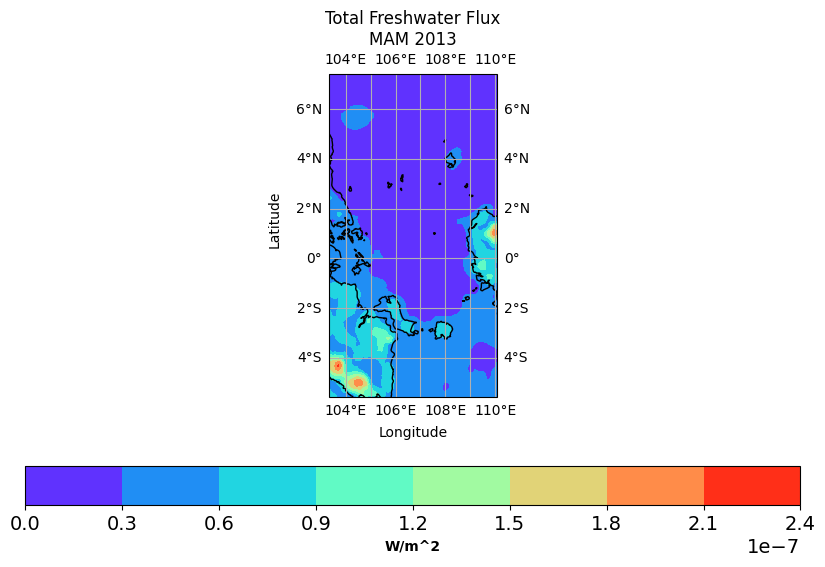

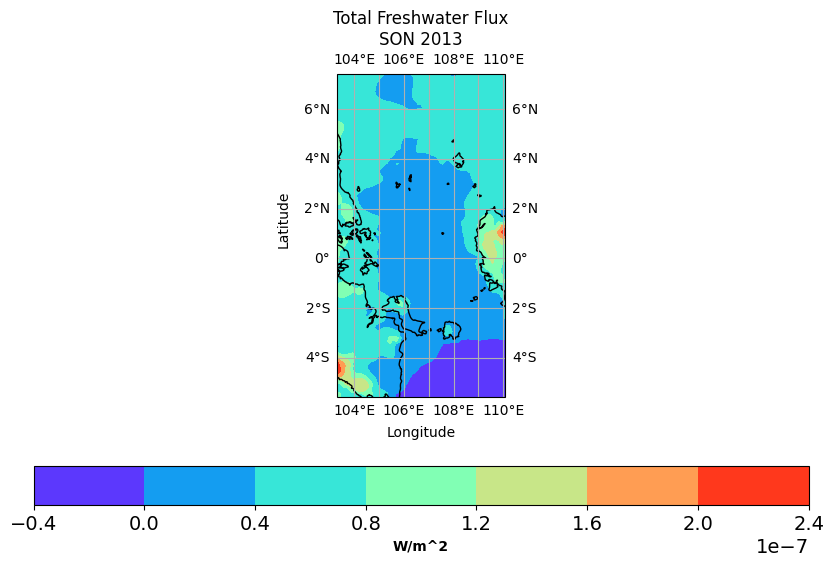

<Figure size 640x480 with 0 Axes>

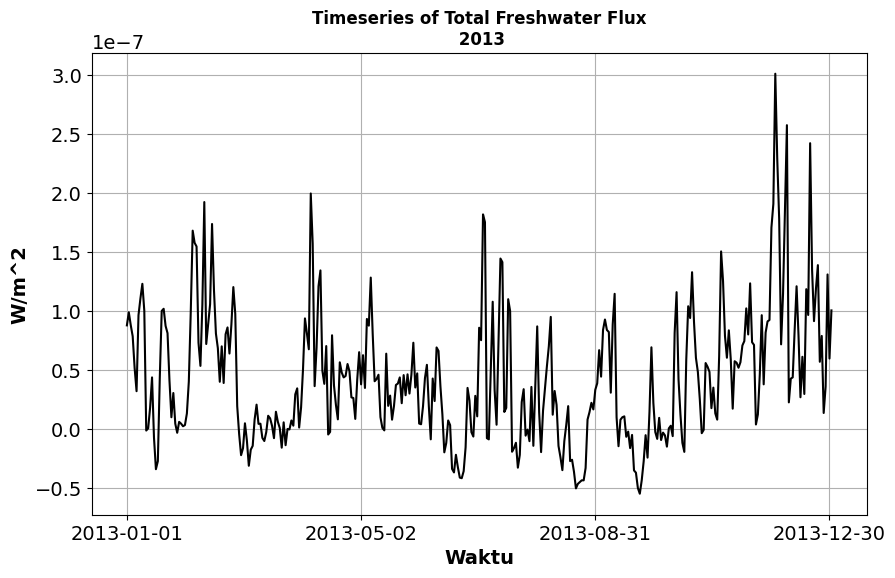

In [91]:
var1 = variablesFwFlux[0]
var2 = variablesFwFlux[1]
var3 = variablesFwFlux[2]

lon = for_total_spasial_fw[var1][0]["longitude"]
lat = for_total_spasial_fw[var1][0]['latitude']

time = for_total_timeseries_fw[var1]["valid_time"]

for i in range(4):
    var1_value_fw = for_total_spasial_fw[var1][i]
    var2_value_fw = for_total_spasial_fw[var2][i]
    var3_value_fw = for_total_spasial_fw[var3][i]

    season = var1_value_fw["season"].values
    
    Qnet_space = var1_value_fw + var2_value_fw + var3_value_fw 
    
    spasial_plot_waktu_total(lon, lat, season, Qnet_space, variablesDictFwFlux["total_freshwater_flux"], folderpath)


var1_value_fw_ts = for_total_timeseries_fw[var1]
var2_value_fw_ts = for_total_timeseries_fw[var2]
var3_value_fw_ts = for_total_timeseries_fw[var3]

Qnet_time = var1_value_fw_ts + var2_value_fw_ts + var3_value_fw_ts

waktu_plot_spasial_total(Qnet_time, time, variablesDictFwFlux["total_freshwater_flux"], folderpath)
    